In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv("ToyotaCorolla.csv",encoding= 'unicode_escape')

In [3]:
df1.head(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
df1[df1.duplicated()]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
df=df1.loc[:, ("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax",'Weight')]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


# Correlation Matrix

In [8]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


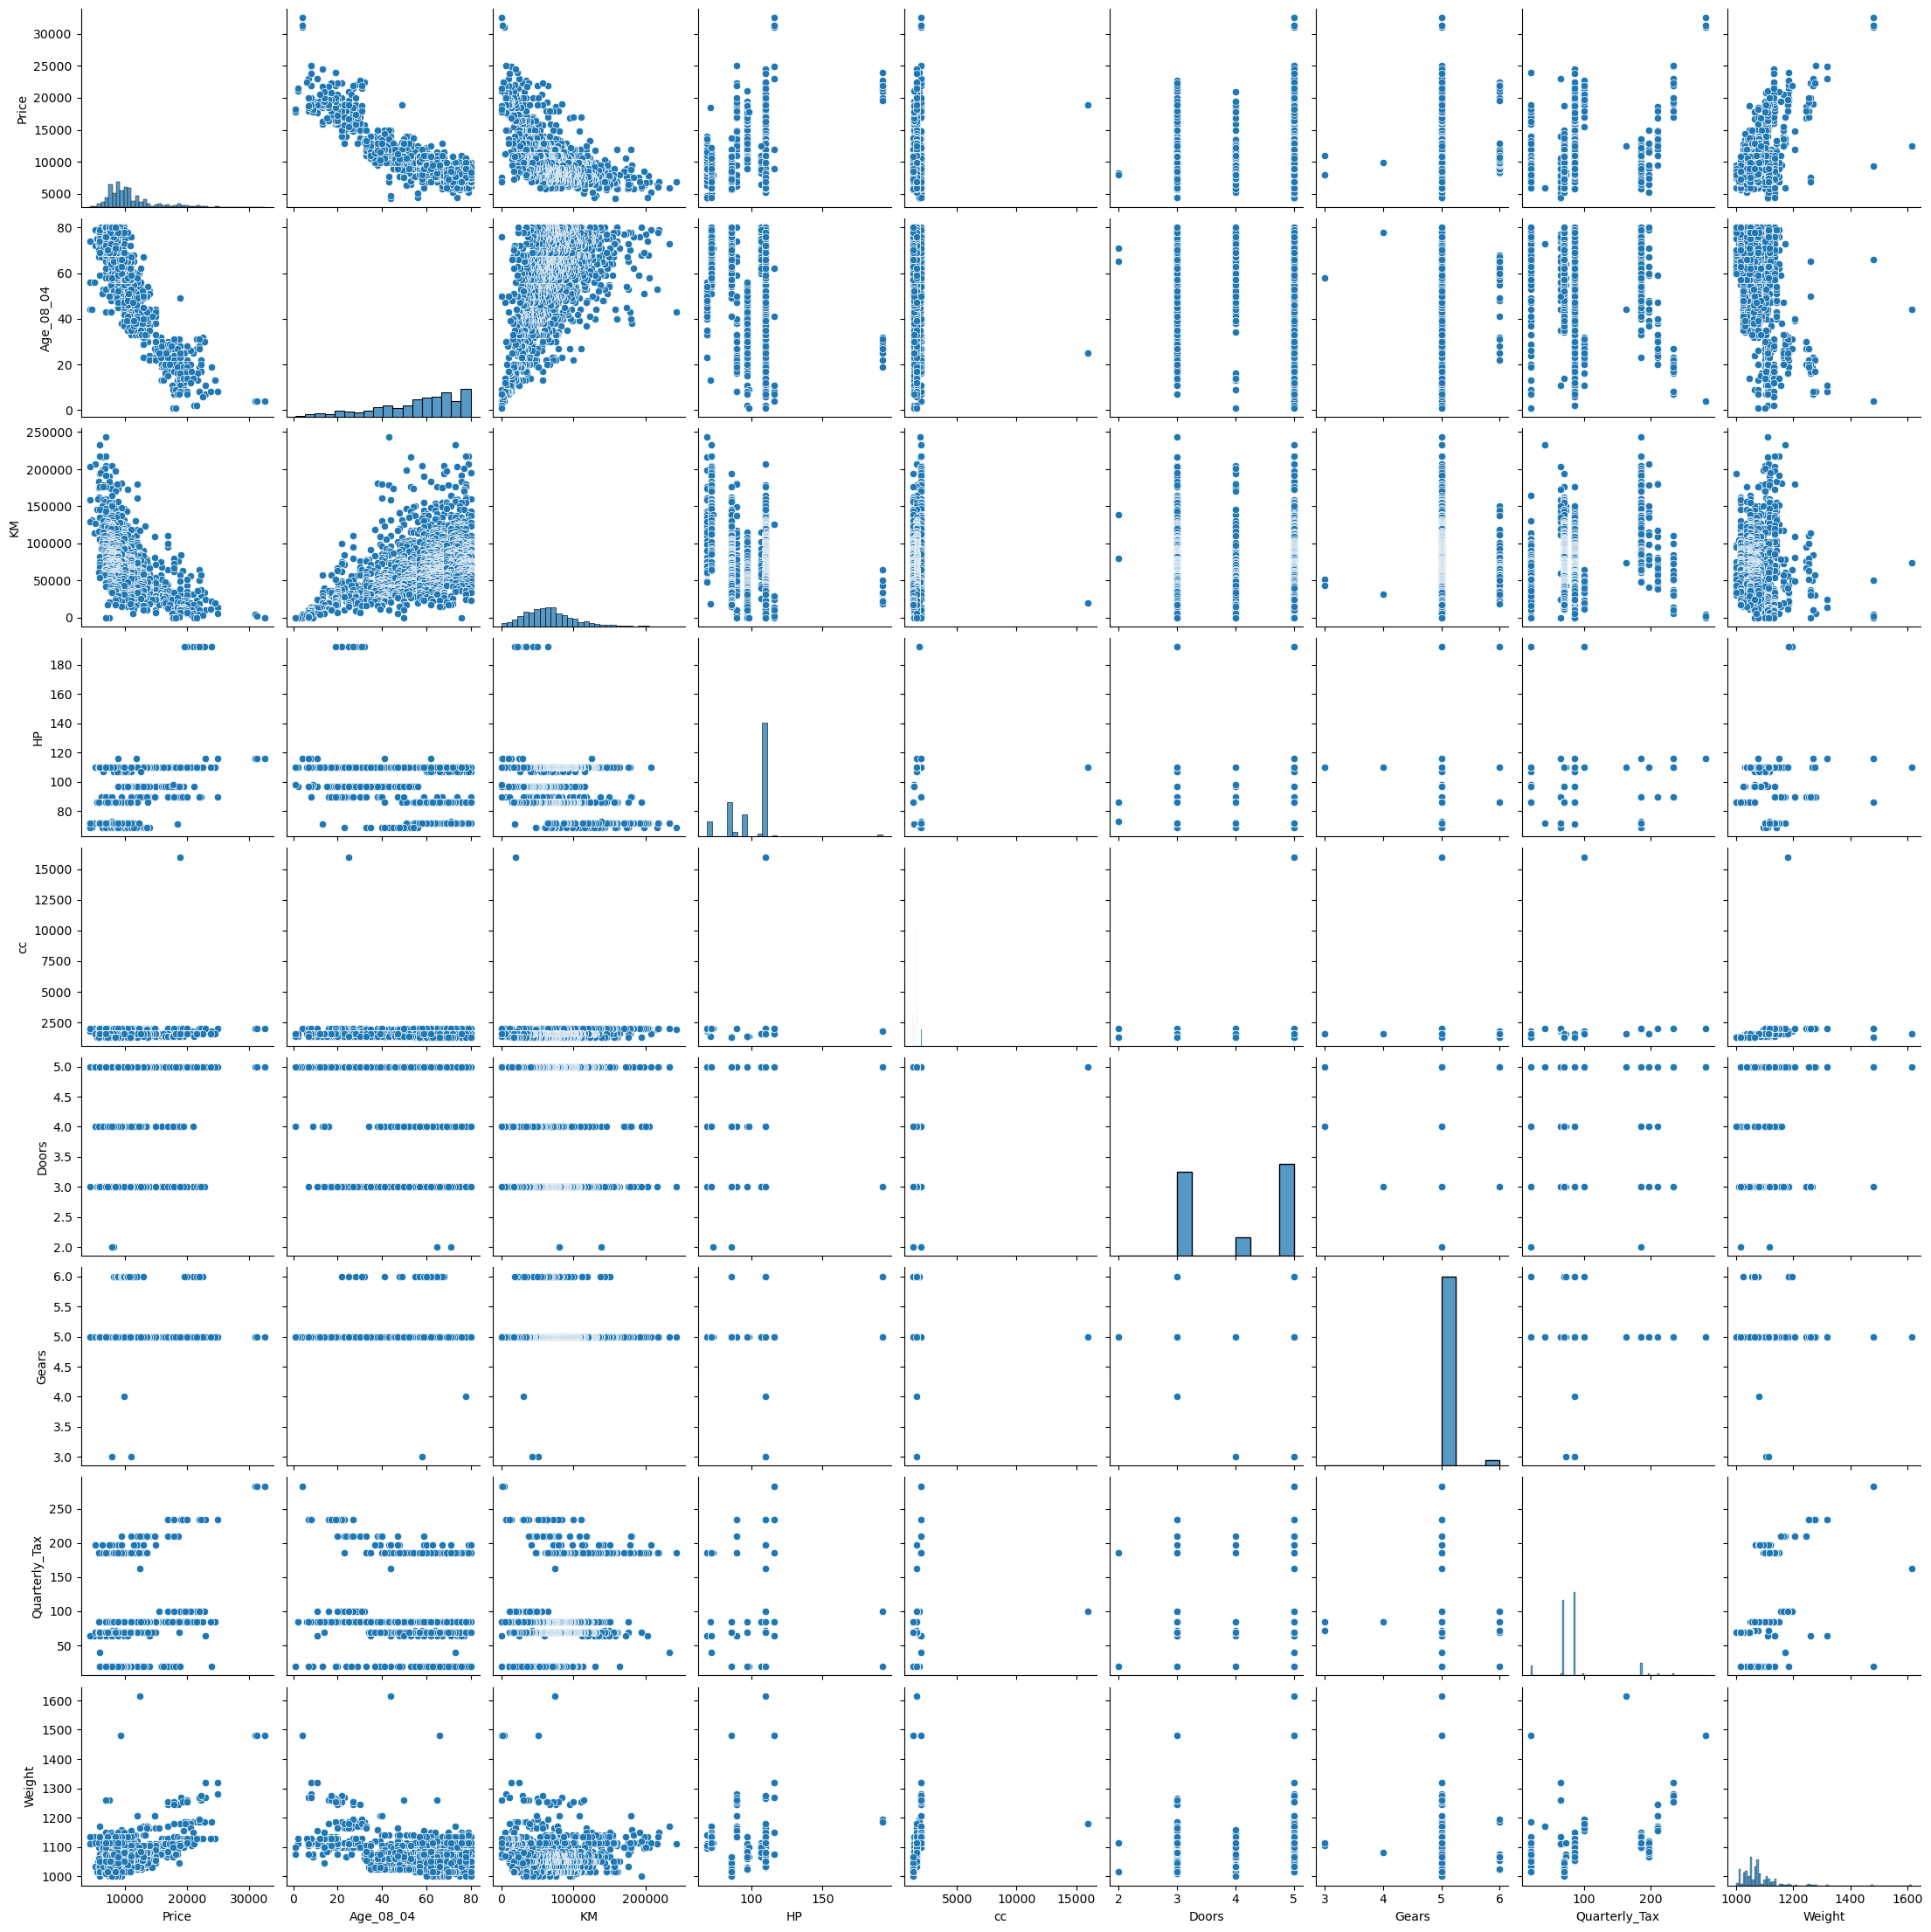

In [9]:
sns.pairplot(df)

In [10]:
df.head(2)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [11]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

# Model Building

In [12]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:24:48   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#Doors is an insignificiat variable and it also does not affect in price, so we can drop Doors directly without cross-verification

# SLR Model

In [15]:
ml_cc=smf.ols('Price~cc',data=df).fit()
print(ml_cc.tvalues, '\n', ml_cc.pvalues)

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [16]:
#cc is significat

# Model Validation - QQ Plot

In [17]:
import statsmodels.api as sm

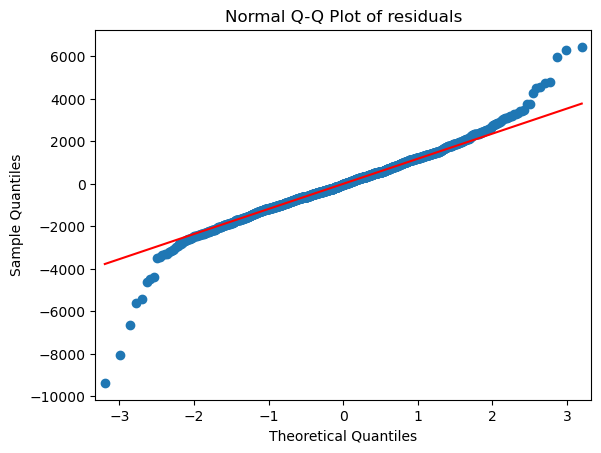

In [18]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q Plot of residuals')
plt.show()

# Residual Plot for Homoscedasticity

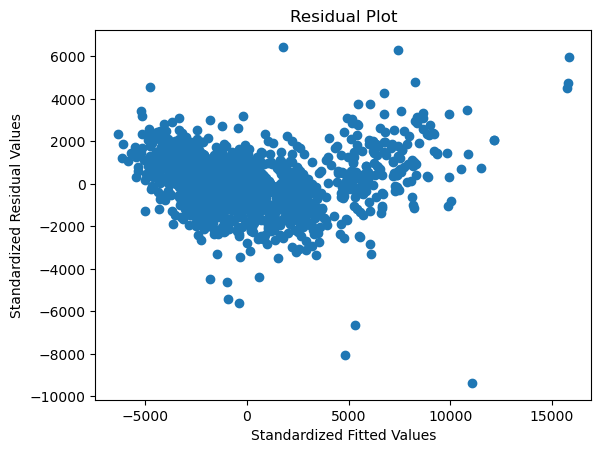

In [19]:
def zscore (vals):
    return(vals-vals.mean())
plt.scatter(zscore(model.fittedvalues),
            zscore(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized Fitted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

# Residual Vs Regressors

eval_env: 1


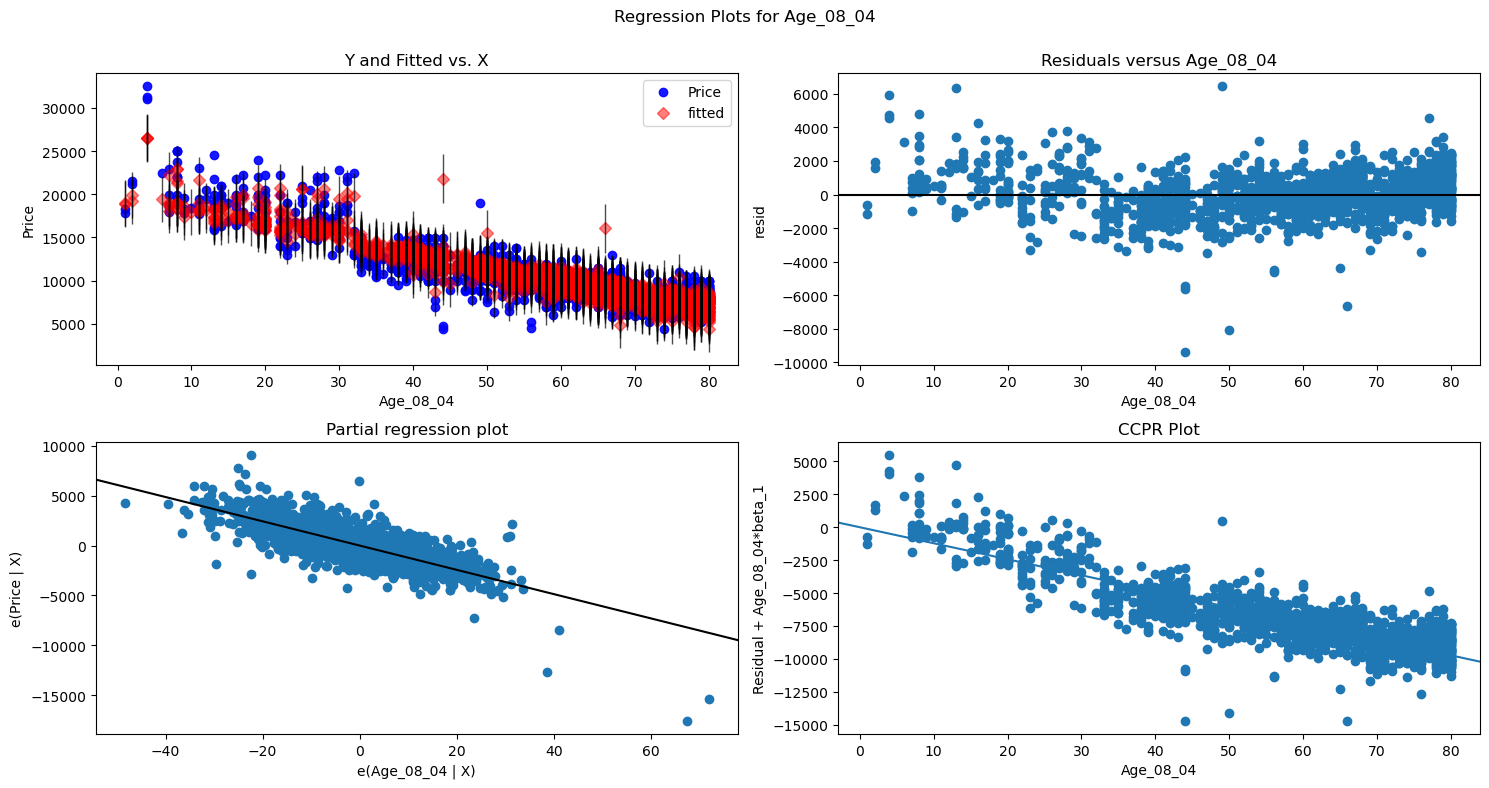

In [20]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)
plt.show()

eval_env: 1


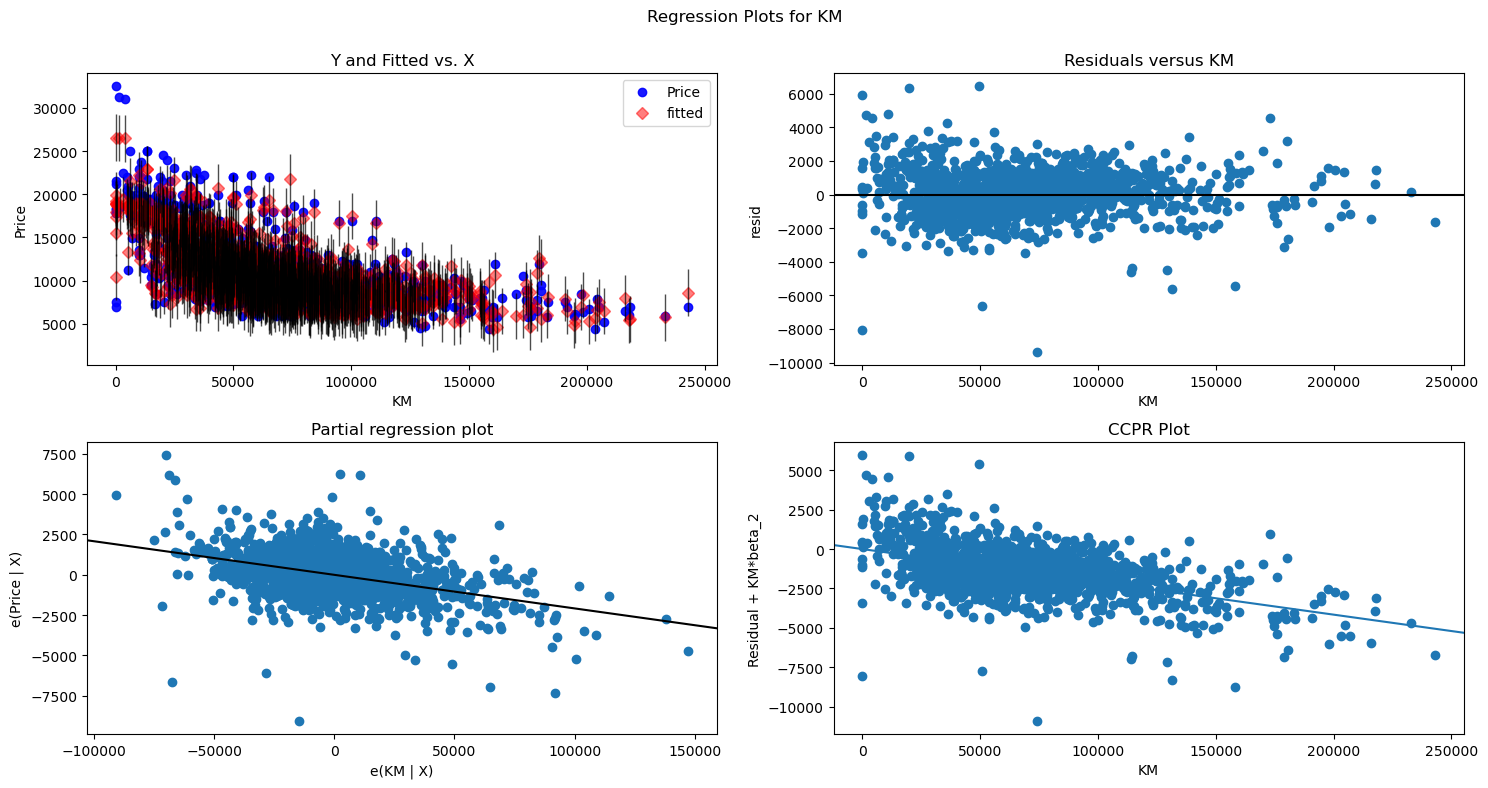

In [21]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


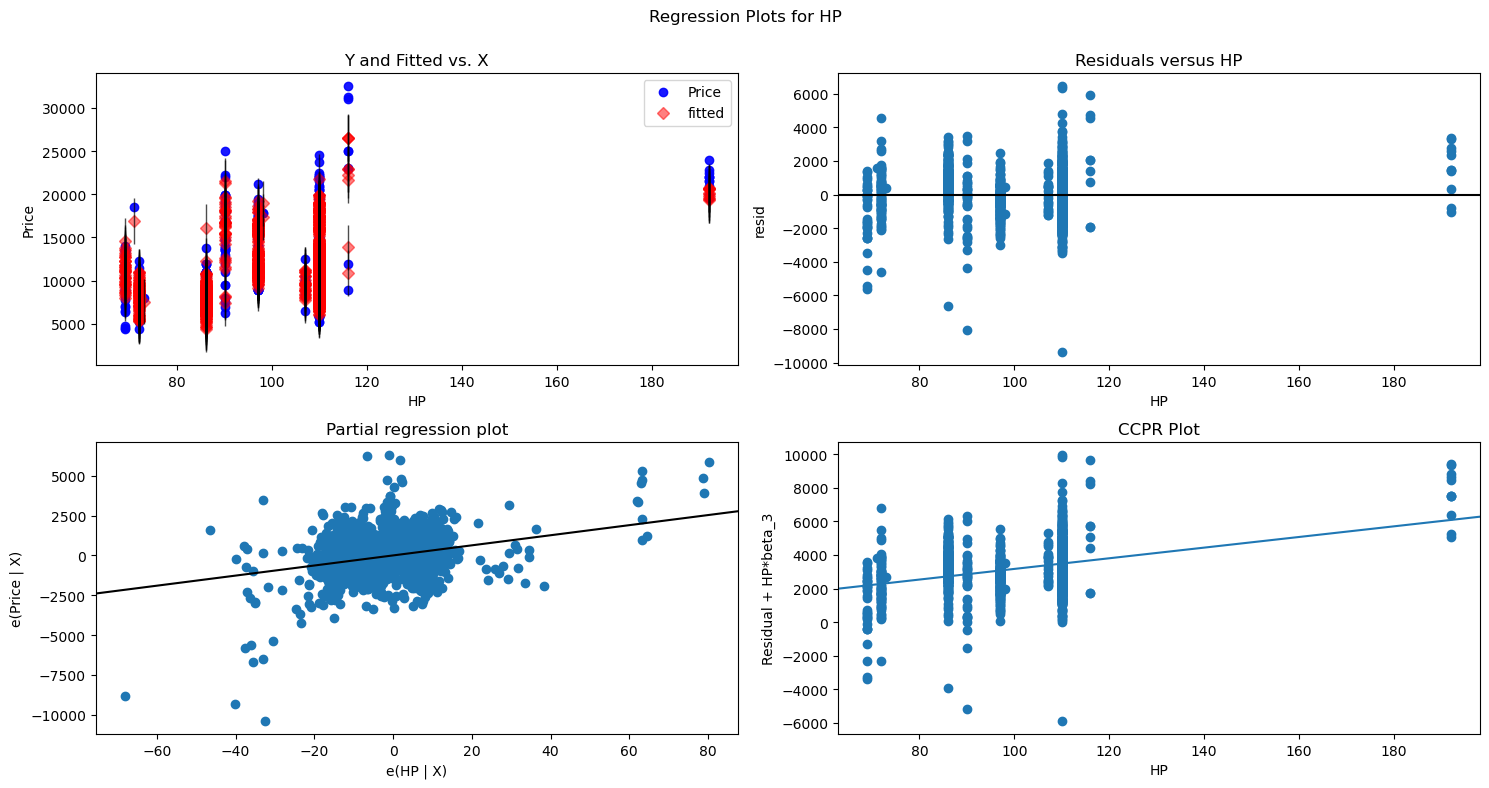

In [22]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


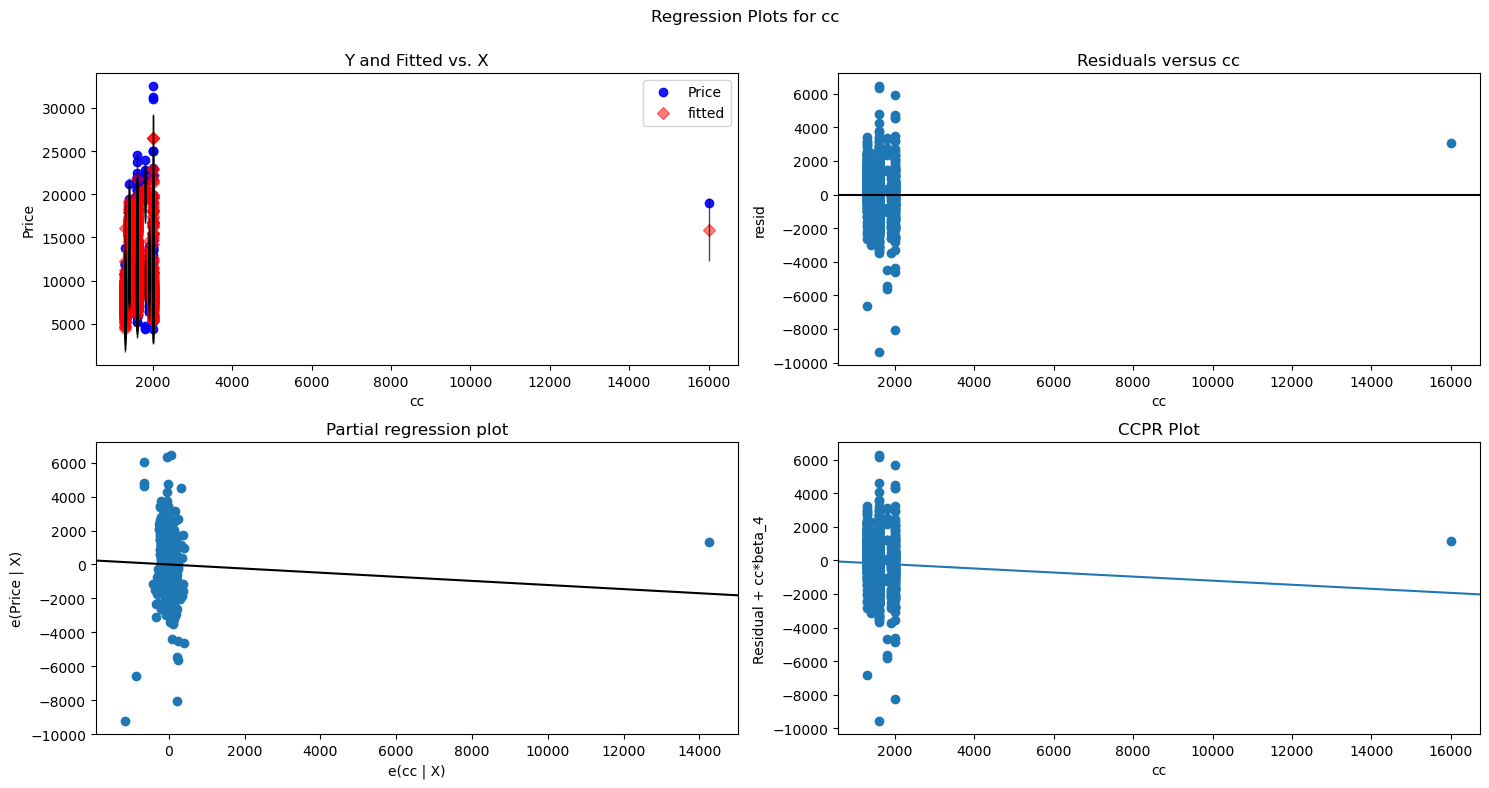

In [23]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

eval_env: 1


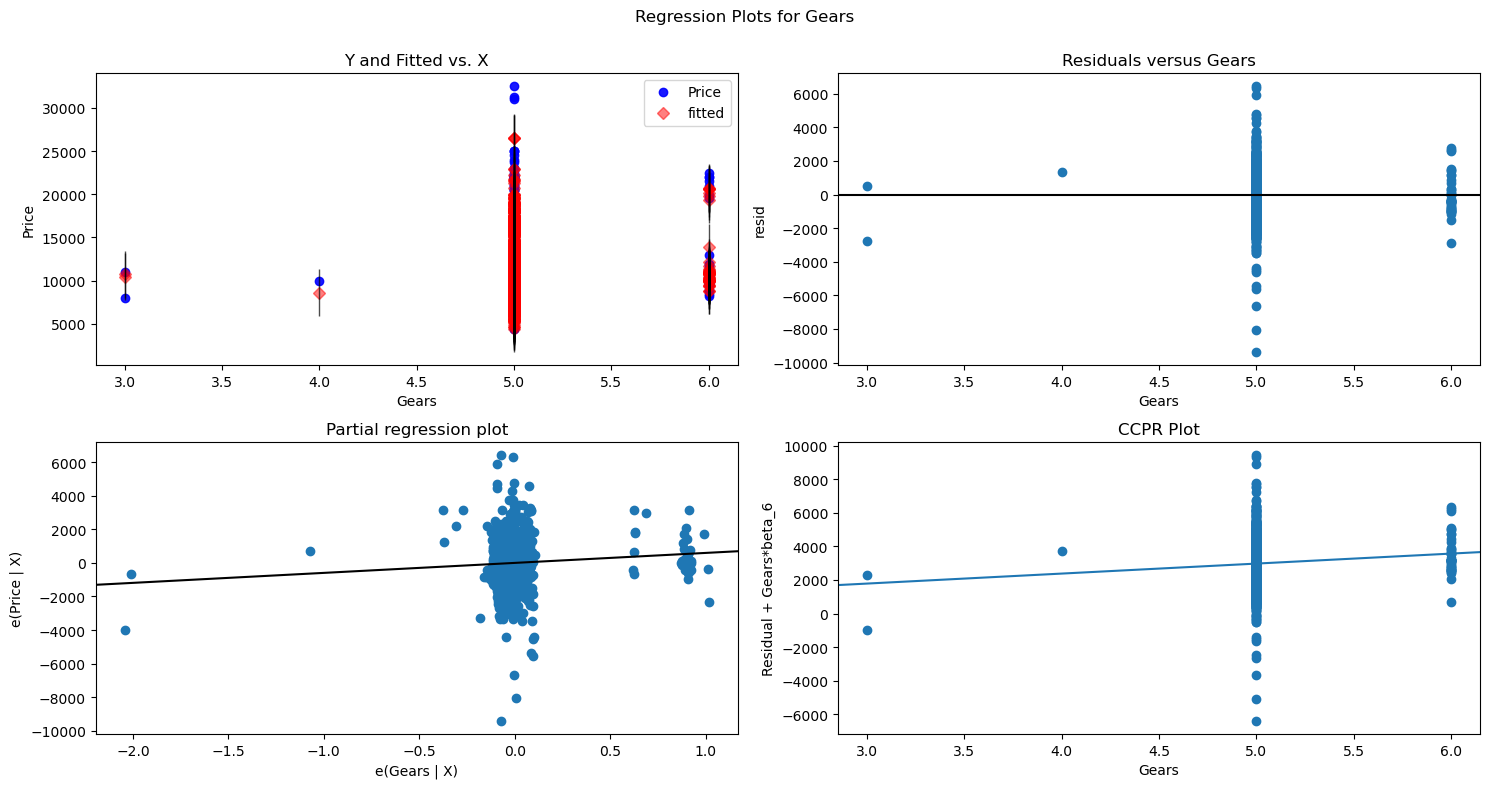

In [24]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


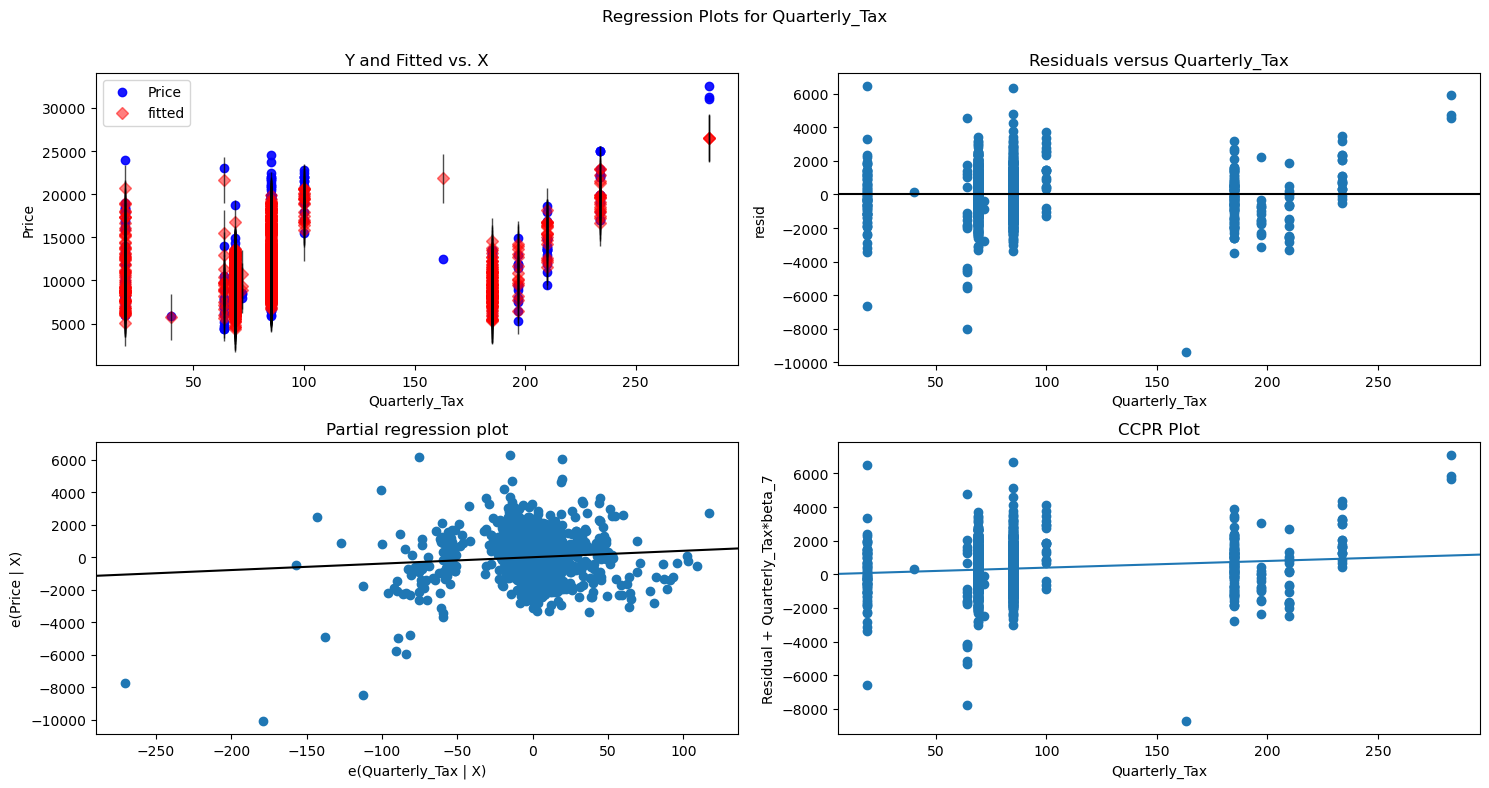

In [25]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)
plt.show()

eval_env: 1


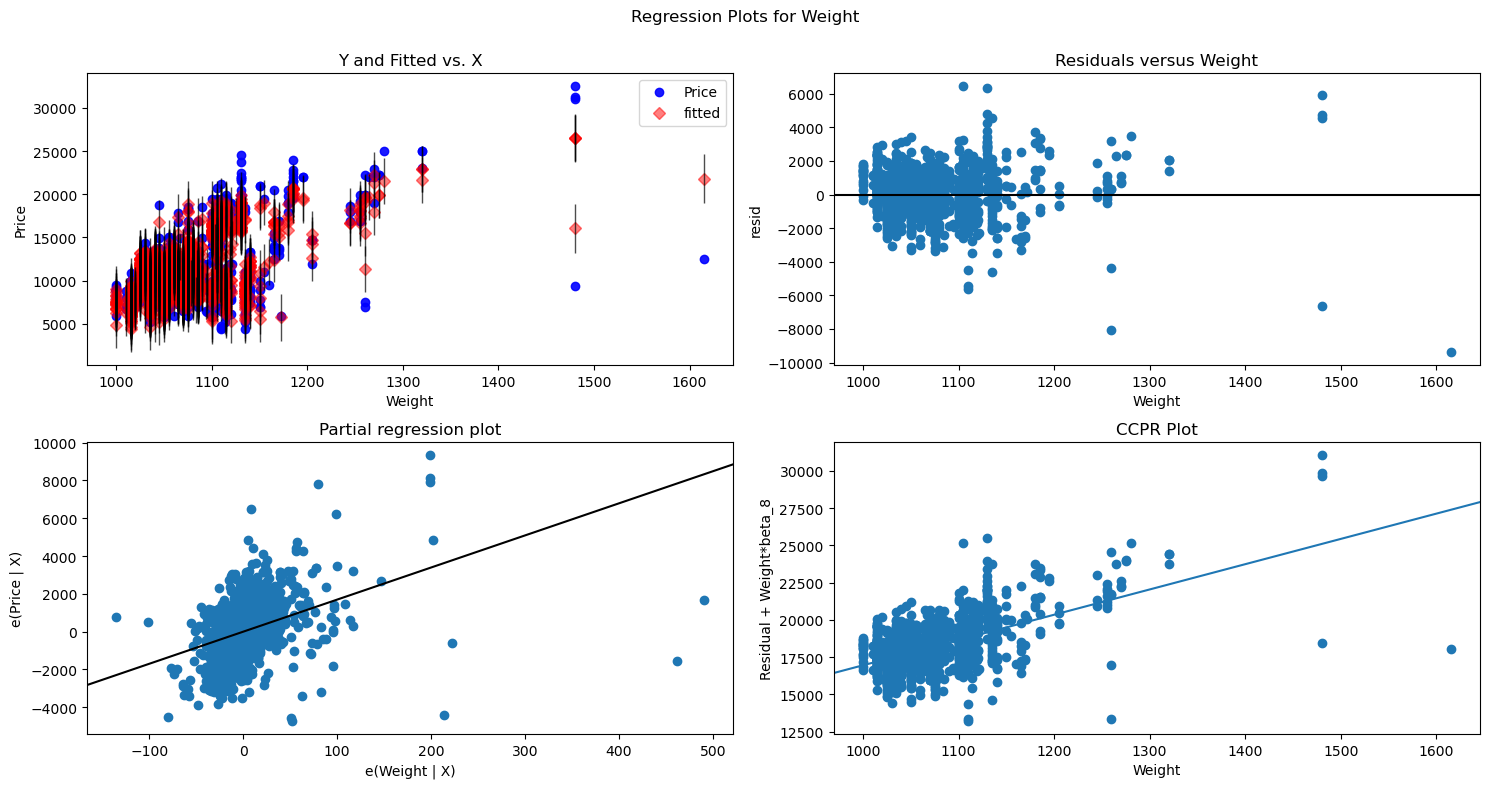

In [26]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Daignostics

# Cook's Distance

In [27]:
model_influence = model.get_influence()
(c,_)= model_influence.cooks_distance

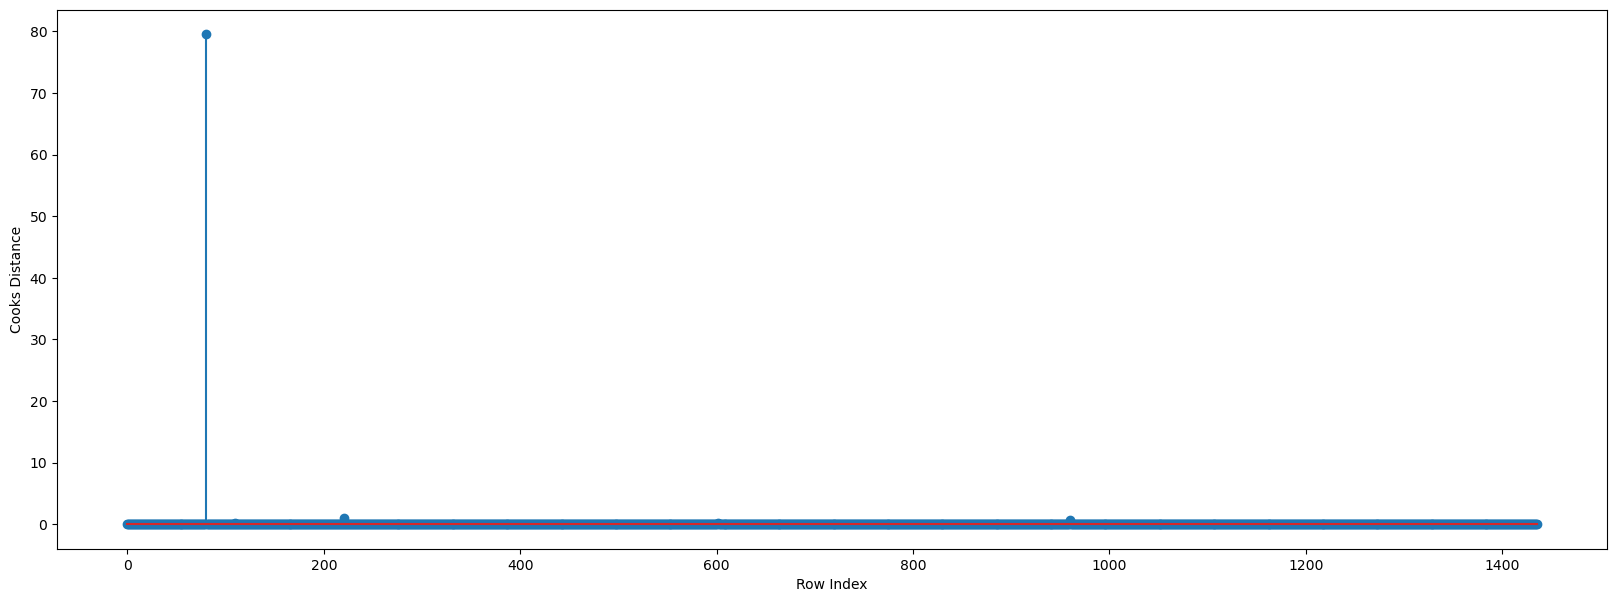

In [28]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [29]:
(np.argmax(c),np.max(c))

(80, 79.52010624137755)

In [30]:
df2 = df.drop(df.index[[80]],axis=0).reset_index()

# High Influence points

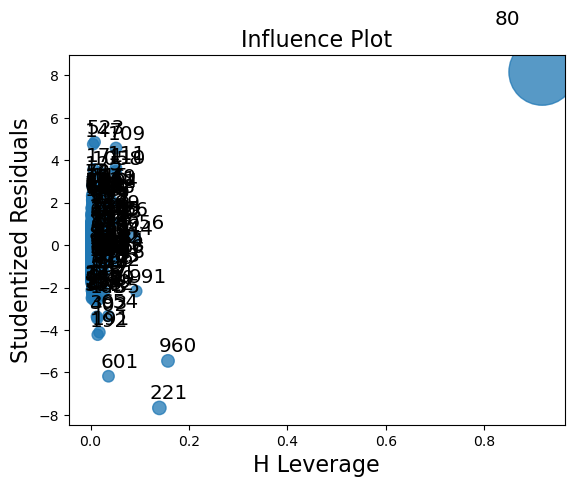

In [31]:
influence_plot(model)
plt.show()

In [32]:
k=8
n=df.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.018802228412256268

# Experimenting Model building

In [33]:
finalmodel=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=df2).fit()

In [34]:
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:24:55   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
Age_08_04      -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM               -0.0179      0.001    -14.029      0.000      -0.020      -0.015
HP               39.1593      2.898     13.512      0.000      33.474      44.844
cc               -2.5069      0.306     -8.188      0.000      -3.107      -1.906
Gears           549.7311    189.216      2.905      0.004     178.561     920.902
Quarterly_Tax     9.0759      1.424      6.374      0.000       6.283      11.869
Weight           19.9623      1.076     18.547      0.000      17.851      22.074
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
df2.shape

(1435, 10)

In [38]:
model_influence_V = finalmodel.get_influence()
(c_V,_)= model_influence_V.cooks_distance

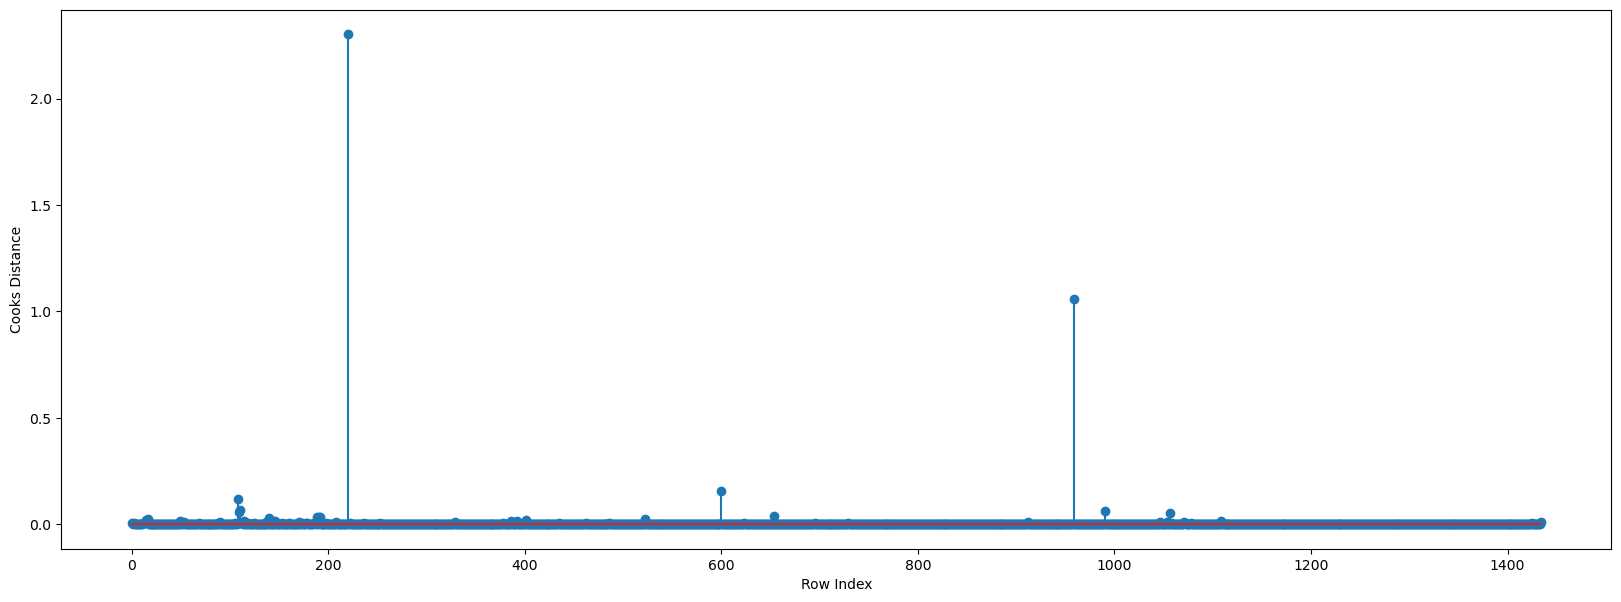

In [66]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(c_V,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [40]:
(np.argmax(c_V),np.max(c_V))

(220, 2.3034451664541264)

In [41]:
df3 = df2.drop(df2.index[[220]],axis=0).reset_index()

In [42]:
df3.shape

(1434, 11)

In [43]:
df3.head(2)

,level_0,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,1,13750,23,72937,90,2000,3,5,210,1165


In [45]:
df3=df3.drop("index",axis=1)

In [46]:
df3=df3.drop("level_0",axis=1)

In [47]:
df3.head(3)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165


In [50]:
finalmodel1=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=df3).fit()

In [51]:
finalmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1461.
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:35:23   Log-Likelihood:                -12280.
No. Observations:                1434   AIC:                         2.458e+04
Df Residuals:                    1426   BIC:                         2.462e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.025e+04   1396.680     -7.341      0.000    -1.3e+04   -7513.393
Age_08_04      -116.6516      2.510    -46.479      0.000    -121.575    -111.728
KM               -0.0174      0.001    -14.074      0.000      -0.020      -0.015
HP               38.8496      2.806     13.845      0.000      33.345      44.354
cc               -3.1527      0.304    -10.384      0.000      -3.748      -2.557
Gears           547.0112    183.189      2.986      0.003     187.663     906.360
Quarterly_Tax     8.0610      1.382      5.832      0.000       5.349      10.773
Weight           24.4820      1.139     21.492      0.000      22.247      26.717
==============================================================================
Omnibus:                      181.376   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1479.005
Skew:                          -0.277   Prob(JB):                         0.00
Kurtosis:                       7.944   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
model_influence_V1 = finalmodel1.get_influence()
(c_V1,_)= model_influence_V1.cooks_distance

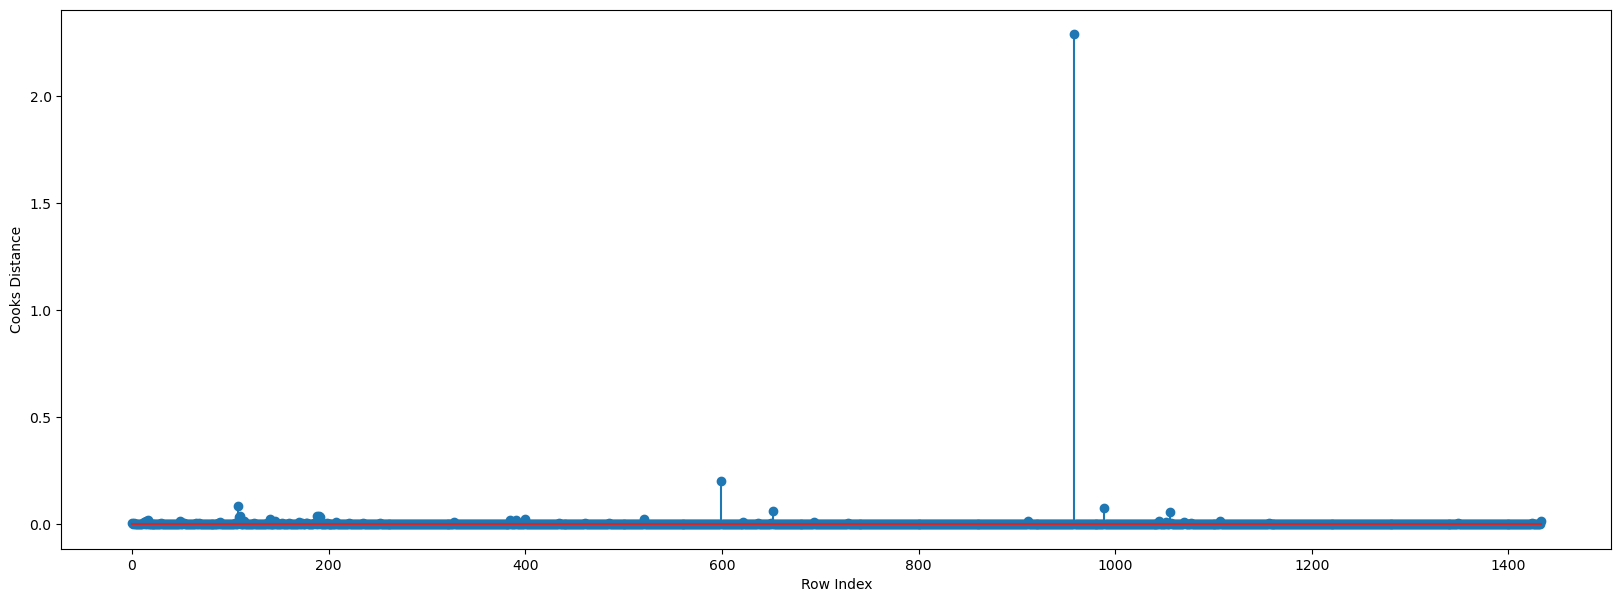

In [53]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df3)),np.round(c_V1,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [54]:
(np.argmax(c_V1),np.max(c_V1))

(958, 2.290715916304523)

In [57]:
# cook's distance value >1

In [55]:
df4 = df3.drop(df3.index[[958]],axis=0).reset_index()

In [56]:
df4.shape

(1433, 10)

In [58]:
df4.head(1)

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165


In [59]:
df4=df4.drop("index",axis=1)

# Final Model Building

In [60]:
finalmodel2=smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=df4).fit()

In [61]:
finalmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1556.
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:41:27   Log-Likelihood:                -12231.
No. Observations:                1433   AIC:                         2.448e+04
Df Residuals:                    1425   BIC:                         2.452e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.45e+04   1435.850    -10.098      0.000   -1.73e+04   -1.17e+04
Age_08_04      -112.4015      2.485    -45.237      0.000    -117.276    -107.527
KM               -0.0172      0.001    -14.328      0.000      -0.020      -0.015
HP               35.9449      2.747     13.084      0.000      30.556      41.334
cc               -3.6665      0.301    -12.198      0.000      -4.256      -3.077
Gears           579.2745    178.171      3.251      0.001     229.769     928.780
Quarterly_Tax     5.5368      1.372      4.034      0.000       2.845       8.229
Weight           29.2975      1.227     23.872      0.000      26.890      31.705
==============================================================================
Omnibus:                      109.903   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.356
Skew:                          -0.060   Prob(JB):                    1.41e-124
Kurtosis:                       6.088   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
model_influence_V2 = finalmodel2.get_influence()
(c_V2,_)= model_influence_V2.cooks_distance

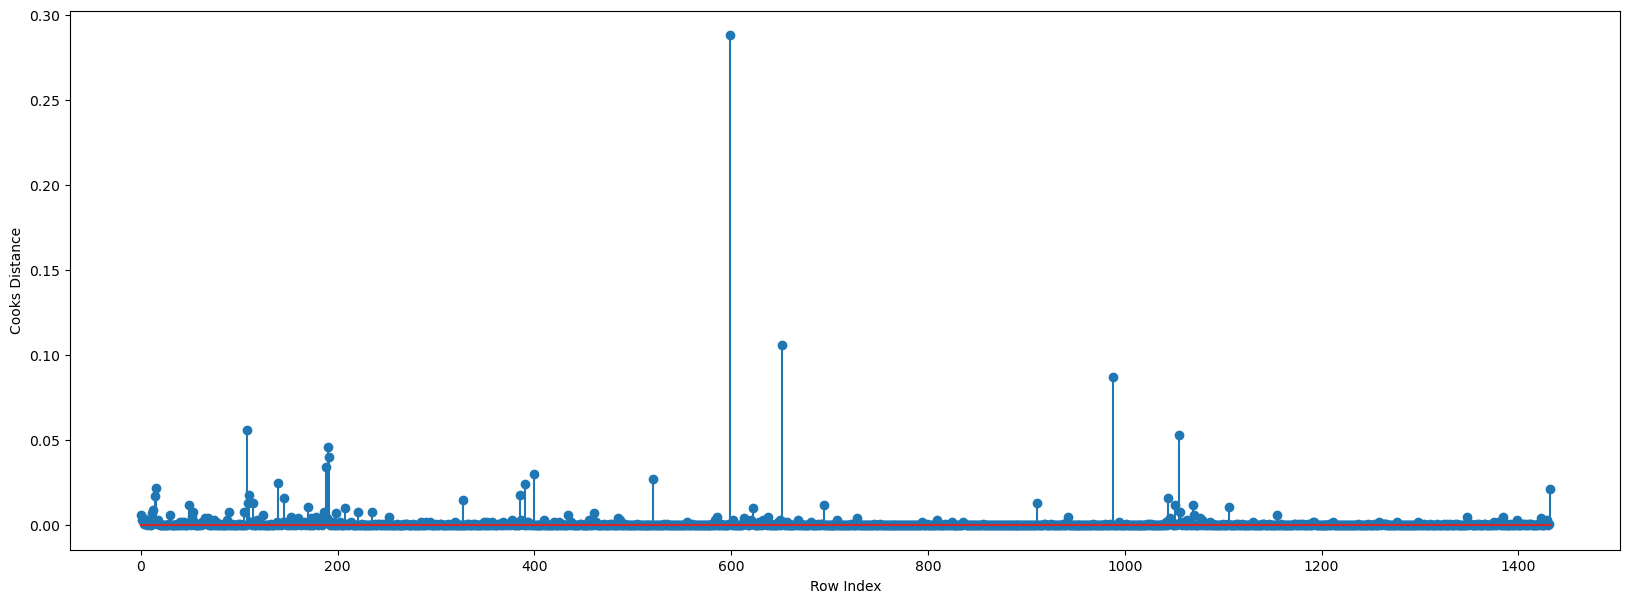

In [63]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c_V2,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [64]:
(np.argmax(c_V2),np.max(c_V2))

(599, 0.2877229363895601)

# cook's distance is < 1. so stop here no more influencing observation for us.

# Prediction

In [72]:
newdata= pd.DataFrame({"Age_08_04":12,"KM":33000,'cc':1800,"HP":90,'Quarterly_Tax':220,"Gears":5,"Weight":1240},index=[1])

In [73]:
finalmodel2.predict(newdata)

1    20662.553191
dtype: float64